In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Wzory

W zadaniu mamy określone warunki początkowe:
$$
x_0 = 0 
$$
$$
y_0 = 0 
$$
$$
u_0 = 100 \cos{\phi} 
$$
$$ 
v_0 = 100 \sin {\phi}
$$

Z fizyki mamy:
$$
x^\prime(t) = u(t) 
$$
$$
y^\prime(t) = v(t) 
$$
$$
u^\prime(t) = -z(t)u(t) 
$$
$$
v^\prime(t) = -g-z(t)v(t)
$$
gdzie  $z(t) = k\sqrt{u^2(t) + v^2(t)}$ wielkość oporu powietrza a $g \approx 9.81$ stałą grawitacyjną.

Dalej rozwijamy z metody Eulera:
$$
x_{n+1} = x_n + hx^\prime(t_n) = x_n + hu_n 
$$
$$
y_{n+1} = y_n + hy^\prime(t_n) = y_n + hv_n 
$$
$$
u_{n+1} = u_n + hu^\prime(t_n) = u_n - hz_nu_n 
$$
$$
v_{n+1} = v_n - h(g + z_nv_n)
$$

## Symulacja

In [2]:
d = {}

for i in range(0,6):
    X, Y = [], []
    # Warunki początkowe
    phi = np.deg2rad(60)
    x = 0
    y = 0
    u = 100*np.cos(phi)
    v = 100*np.sin(phi)
    k = i
    g = 9.81
    h = 0.00001
    # symulacja lotu
    while y >= 0:
        z = k*np.sqrt(u**2 + v**2)
        x_new = x + h*u
        y_new = y + h*v
        u_new = u - h*z*u
        v_new = v - h*(g + z*v)
        X.append(x)
        Y.append(y)
        x,y,u,v = x_new, y_new, u_new, v_new
    d[i] = (X, Y)

## Wykresy

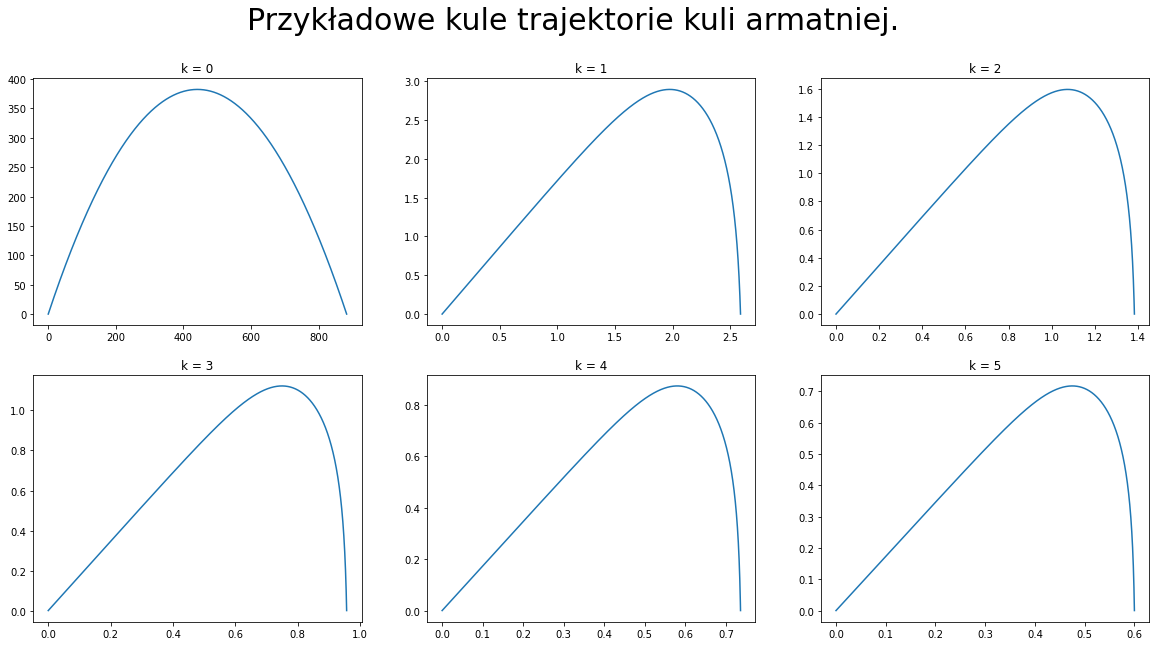

In [3]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3,figsize=(20,10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
fig.suptitle('Przykładowe kule trajektorie kuli armatniej.', fontsize=30)
for i,axi in enumerate(axes):
    axi.title.set_text('k = {}'.format(i))
    axi.plot(d[i][0], d[i][1])